<a href="https://colab.research.google.com/github/prasanna-nagaraju/Next-Word-Prediction/blob/main/Next_Word_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 **Shakespeare-Hamlet Next Word Prediction using LSTM** 🎭

Welcome to the **Shakespeare-Hamlet Next Word Prediction** project! This project utilizes an LSTM (Long Short-Term Memory) neural network to predict the next word in a sequence based on the text of *Hamlet* by William Shakespeare. The goal is to generate Shakespearean text using an AI model trained on the play’s data.

## 🧠 **Objective:**
Use deep learning with an LSTM model to predict the next word in Shakespeare's *Hamlet* text. By providing a seed phrase, the model will predict and complete the next words in Shakespearean style! ✨

---


## 🔧 **Project Setup**

### 1. **Load the Text (Hamlet) 📜:**

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.15.0'

In [6]:
with open('shakespeare-hamlet.txt', 'r') as file:
    docs = file.read()

FileNotFoundError: [Errno 2] No such file or directory: 'shakespeare-hamlet.txt'

In [ ]:
print(docs[:500])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not



### 2. **Tokenization & Sequence Generation 🔠:**
Convert the text into sequences of words so that the model can learn the next-word prediction based on previous context.

In [4]:
tokenizer = Tokenizer()

NameError: name 'Tokenizer' is not defined

In [ ]:
tokenizer.fit_on_texts([docs])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Add 1 because word_index starts from 1, but embedding expects from 0
print("Vocabulary size:", vocab_size)

Vocabulary size: 4818


In [ ]:
# Inspect the word associated with index 4817 (for verification)
for word, index in tokenizer.word_index.items():
    if index == 4817:
        print(word)

finis


In [ ]:
# Creating input sequences for training
input_seq = []
for sentence in docs.split("\n"):
    tokenized_sent = tokenizer.texts_to_sequences([sentence])[0]
    # Convert the sentence into a sequence of numbers using the tokenizer
    # `texts_to_sequences` returns a list of lists, so we take the first list with `[0]`
    for i in range(1, len(tokenized_sent)):  # Iterate over the length of the tokenized sentence
        input_seq.append(tokenized_sent[: i + 1]) # Append a growing sublist of the tokenized sentence (from the first token to the i-th token)

In [ ]:
input_seq[:10]

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891]]

In [ ]:
# Padding the sequences to the maximum length in the dataset
max_seq_length = max([len(x) for x in input_seq])
padded_input_sequence = pad_sequences(input_seq, maxlen=max_seq_length, padding="pre")

In [ ]:
padded_input_sequence[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
       687], dtype=int32)

In [ ]:
# Splitting input and output sequences
X = padded_input_sequence[:, :-1]
y = padded_input_sequence[:, -1]

In [ ]:
X[0],y[0]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32), np.int32(687))

In [ ]:
# One-hot encoding the output labels (y)
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.])


### 3. **Build the LSTM Model 🧩:**
We use a Sequential model with an Embedding layer followed by an LSTM layer and a Dense output layer.

In [ ]:
# Model Architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(LSTM(100))
model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X, y, epochs=10)

Epoch 1/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0292 - loss: 7.0754
Epoch 2/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0408 - loss: 6.4107
Epoch 3/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0539 - loss: 6.2000
Epoch 4/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0653 - loss: 5.9613
Epoch 5/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0850 - loss: 5.7112
Epoch 6/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1010 - loss: 5.4697
Epoch 7/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1094 - loss: 5.2443
Epoch 8/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1223 - loss: 5.0229
Epoch 9/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1358 - loss: 4.8329
Epoch 10/10
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1454 - loss: 4.6334


## 📊 **Plot Training Loss & Accuracy 📈:**
Visualize the model’s performance during training.

In [ ]:
# Extract loss and accuracy values from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

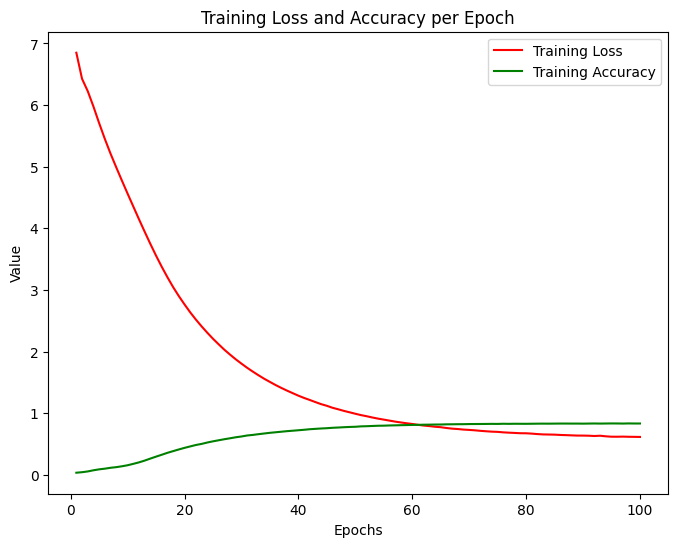

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy per Epoch')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X,y)

805/805 [==============================] - 8s 9ms/step - loss: 0.5614 - accuracy: 0.8498


[0.5614160299301147, 0.8497979044914246]


## 📝 **Next Word Prediction Function:**
You can now predict what comes next in Hamlet’s iconic lines! 🎬

---

In [2]:
def prediction(text:str, n_word:int)->str:
    """
    Predict the next 'n_word' words based on the input 'text'.

    Args:
    text (str): The input text to seed the prediction.
    n_word (int): The number of words to predict and append.

    Returns:
    str: The input text appended with the predicted words.
    """

    for _ in range(n_word):
        # Convert the input text to sequences (tokenized)
        token_text = tokenizer.texts_to_sequences([text])[0]

        # Pad the sequence to the max sequence length expected by the model
        padded_token_input = pad_sequences([token_text], maxlen=max_seq_length, padding="pre")

        # Predict the probabilities for the next word
        output_prob = model.predict(padded_token_input, verbose=0)

        # Find the word with the highest probability
        pos = np.argmax(output_prob)

        # Map the predicted index back to the corresponding word
        for word, index in tokenizer.word_index.items():
            if index == pos:
                # Append the predicted word to the input text
                text = text + " " + word
                break

    return text


In [ ]:
'''text (str): The input sentence to start the prediction.
n_word (int): The number of words to predict.
Returns (str): The original text with n_word predicted words appended.

Runs n_word times to generate and append words one by one.

The tokenizer.texts_to_sequences() function converts the input text into a sequence of numerical tokens.
Since texts_to_sequences() returns a list of lists, [0] extracts the first list.

Ensures token_text has the same length as expected by the model (max_seq_length).
If the sequence is shorter, it is pre-padded with zeros.

The trained model predicts the probability distribution for the next word.

Loops through the tokenizer's word dictionary to find the word corresponding to pos.

Adds the predicted word to the original text.'''

In [3]:
text="God blesse"
n_word=2
prediction(text,n_word)

NameError: name 'tokenizer' is not defined

In [ ]:
text="The Tragedie of Hamlet"
n_word=4
prediction(text,n_word)

'The Tragedie of Hamlet by william shakespeare 1599'

## 🔥 **Conclusion:**
- This project demonstrates how an LSTM model can be used to predict the next word in a sequence, using *Hamlet* as training data.
- The model can generate authentic-looking Shakespearean text based on the input sequence, providing a unique exploration into the world of natural language generation!
